In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.optimize import fmin_tnc
import random
import math

data = scipy.io.loadmat('ex3data1.mat')
print(data['X'])

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


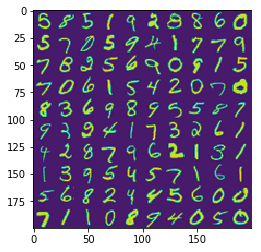

In [2]:
X = random.sample(list(data['X']),100)

def visualizeDigits(X):
    bigImg = np.zeros((200,200))
    
    xIndex = 0
    yIndex = 0
    
    for x in X:
        if xIndex == 200:
            yIndex += 20
            xIndex = 0
        img = np.reshape(x, (20,20)).T
        bigImg[xIndex:xIndex+20,yIndex:yIndex+20] = img
        xIndex += 20
    plt.imshow(bigImg)
    plt.show()
    return

visualizeDigits(X)

In [3]:
def sigmoid(x): # same as before
    return 1.0/(1+ np.exp(-x))

def regularizedCost(theta,X,y,lamda):
    theta_with_0_as_first = np.insert(theta[1:], 0, 0) 
    # important! don't want to incorporate theta_0 for the regularization term
    # thus substitute theta_0 with 0 and use theta_with_0_as_first for our reg term

    theta = np.matrix(theta)
    m = len(y)
    h = sigmoid(X*theta.T)

    reg_term = (lamda/(2*m))* np.sum(np.square(theta[1:]))
    
    cost = (-y.T * np.log(h) - (1-y).T * np.log(1-h))/m + reg_term
    return cost[0,0]

def regularizedGradient(theta,X,y,lamda): # vectorized implementation
    theta_with_0_as_first = np.insert(theta[1:],0,0)
    
    theta = np.matrix(theta)
    theta_with_0_as_first = np.matrix(theta_with_0_as_first)
    m = len(y)
    error = sigmoid(X*theta.T) - y
    
    regTerm = (lamda/m) * theta_with_0_as_first.T
    gradient = (X.T * error) / m + regTerm # added regTerm
    
    return gradient

In [4]:
X_data = np.insert(data['X'],0,1,axis=1) # insert column of 1's for bias column
y_data = data['y']

initial_theta = np.zeros(X_data.shape[1])

def oneVsAll(X,y,theta,lamda):
    labels = np.unique(y)
    theta_matrix = []
    for i in labels:
        logicalColumn = y == i
        logicalColumn.astype(int)
       
        minimum = fmin_tnc(func=regularizedCost, x0=theta, fprime=regularizedGradient, args=(X, logicalColumn, lamda))
        cost = regularizedCost(minimum[0],X,logicalColumn,lamda)
        new_theta = minimum[0]
        theta_matrix.append(new_theta)
    
    return np.array(theta_matrix)

In [5]:
fittedThetaMatrix = oneVsAll(X_data,y_data,initial_theta,0)
print(fittedThetaMatrix)

/Users/eddiewang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.


[[ -4.54746508e-01   0.00000000e+00   0.00000000e+00 ...,  -2.76288918e-06
    2.85072963e-07   0.00000000e+00]
 [ -1.10144924e+00   0.00000000e+00   0.00000000e+00 ...,   8.92805236e-05
   -7.62284621e-06   0.00000000e+00]
 [ -1.03172691e+00   0.00000000e+00   0.00000000e+00 ...,  -9.36374848e-06
    5.71488194e-07   0.00000000e+00]
 ..., 
 [ -1.72307282e+00   0.00000000e+00   0.00000000e+00 ...,  -1.70201473e-05
    1.05565204e-06   0.00000000e+00]
 [ -1.58635142e+00   0.00000000e+00   0.00000000e+00 ...,  -3.01715861e-05
    2.30763154e-06   0.00000000e+00]
 [ -1.63029298e+00   0.00000000e+00   0.00000000e+00 ...,  -8.60388642e-05
    2.79633514e-06   0.00000000e+00]]


In [9]:
def oneVsAllPrediction(theta, X, y): # assuming column of 1's already inserted
    X_matrix = np.matrix(X)
    theta_matrix = np.matrix(theta).T
    
    intermediateMatrix = X_matrix * theta_matrix # 5000 x 10 matrix
    probabilities = sigmoid(intermediateMatrix) # matrix of probabilities
    
    print(probabilities)
    # going to take the argmax (index of max probability) for each row in probabilities
    # for each index, we are going to add 1 for our final label, since if index 0 is highest
    # probability -> label is 1
    # index 2 -> label is 2
    # ...
    # index 9 -> label is 0
    
    predicted = np.argmax(probabilities, axis=1)
    print(predicted)
    print(data['y'])
    predicted = np.vectorize(updateIndices)(predicted)
    print(predicted)
    accuracy = getAccuracy(y,predicted)
    
    return accuracy

def updateIndices(index):
    return index + 1
    

def getAccuracy(actual,predicted): # returns percentage accuracy between actual dataset and predicted dataset
    logicalColumn = actual == predicted
    logicalColumn = logicalColumn.astype(int)
    print(logicalColumn)
    m = logicalColumn.shape[0]
    numberCorrect = np.sum(logicalColumn)
    return numberCorrect/m

# print(fittedThetaMatrix)
# print(X_data)
# print(fittedThetaMatrix.shape)
# print(X_data.shape)
oneVsAllPrediction(fittedThetaMatrix, X_data, y_data)

[[  5.33861526e-06   3.87822251e-05   2.36757886e-04 ...,   2.70546859e-05
    1.28202542e-04   9.99981730e-01]
 [  9.80483047e-06   4.03954437e-06   1.42230073e-04 ...,   9.70766926e-07
    2.79455566e-06   9.99933552e-01]
 [  6.38551990e-07   1.43773605e-06   1.69994999e-05 ...,   3.73357875e-04
    1.79230013e-05   4.30218776e-03]
 ..., 
 [  6.18953064e-04   6.96939691e-05   2.26975324e-03 ...,   2.49132899e-04
    6.38961599e-01   2.52878558e-06]
 [  7.76940389e-07   1.03274128e-09   1.26501460e-09 ...,   1.30168310e-07
    9.32841075e-01   3.04005495e-06]
 [  3.07347148e-07   8.00127756e-04   1.14974291e-06 ...,   6.47572312e-06
    1.87907301e-04   1.12765889e-02]]
[[9]
 [9]
 [4]
 ..., 
 [8]
 [8]
 [9]]
[[10]
 [10]
 [10]
 ..., 
 [ 9]
 [ 9]
 [ 9]]
[[10]
 [10]
 [ 5]
 ..., 
 [ 9]
 [ 9]
 [10]]
[[1]
 [1]
 [0]
 ..., 
 [1]
 [1]
 [0]]


0.76539999999999997

In [7]:
theta_matrix = np.matrix((100,100))
theta_matrix

matrix([[100, 100]])

In [8]:
data['y'] == data['y']

array([[ True],
       [ True],
       [ True],
       ..., 
       [ True],
       [ True],
       [ True]], dtype=bool)